In [40]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
plt.style.use('ggplot')
rcParams['figure.figsize'] = (12,6)

In [25]:
flOcean = pd.read_csv('FL_OCEAN_2022.csv')
flOcean.head()

,Time (UTC),Latitude,Longitude,Temperature QC,Temperature,Salinity QC,Salinity,Chlorophyll QC,Chlorophyll,Turbidity QC,...,Oxygen QC,Oxygen,Waves QC,Significant wave height,Wave from direction,Wave period,North surface currents,East surface currents,Unnamed: 19,Unnamed: 20
0,5/17/22 15:30,36.99836,-76.08920,2,NaN,2,NaN,2.0,NaN,2.0,...,2.0,NaN,2,NaN,2,NaN,2,NaN,234.22,-217.71
1,5/17/22 15:36,36.99836,-76.08920,2,NaN,2,NaN,2.0,NaN,2.0,...,2.0,NaN,2,NaN,2,NaN,2,NaN,229.55,-186.16
2,5/17/22 15:42,36.99836,-76.08902,2,NaN,2,NaN,2.0,NaN,2.0,...,2.0,NaN,2,NaN,2,NaN,2,NaN,220.34,-148.13
3,5/17/22 15:48,36.99836,-76.08907,2,NaN,2,NaN,2.0,NaN,2.0,...,2.0,NaN,2,NaN,2,NaN,2,NaN,215.45,-107.26
4,5/17/22 15:54,36.99833,-76.08920,2,NaN,2,NaN,2.0,NaN,2.0,...,2.0,NaN,2,NaN,2,NaN,2,NaN,241.88,-25.38


In [26]:
flOcean.drop(list(flOcean.filter(regex = 'QC')), axis = 1, inplace = True)

In [75]:
flOcean.describe(include='all')

,Time (UTC),Latitude,Longitude,Temperature,Salinity,Chlorophyll,Turbidity,Oxygen,Significant wave height,Wave from direction,Wave period,North surface currents,East surface currents,Unnamed: 19,Unnamed: 20
count,33398,33398.000000,33398.000000,3126.000000,3126.000000,0.0,0.0,0.0,9354.000000,33398.000000,9354.000000,33398.000000,9354.000000,1747.000000,1747.000000
unique,33398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,5/17/22 15:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,36.998019,-76.088373,22.894878,27.779277,NaN,NaN,NaN,0.574346,1.755734,156.147915,1.755734,7.959971,-20.202284,56.364493
std,NaN,0.047379,0.097375,1.569828,1.758980,NaN,NaN,NaN,0.347572,0.429658,111.372439,0.429658,4.136855,250.262544,298.943126
min,NaN,28.345460,-76.204190,19.430000,24.830000,NaN,NaN,NaN,0.000000,1.000000,0.000000,1.000000,0.000000,-657.360000,-629.410000
25%,NaN,36.998250,-76.089200,21.570000,26.610000,NaN,NaN,NaN,0.330000,2.000000,63.900000,2.000000,4.140000,-226.860000,-197.825000
50%,NaN,36.998260,-76.088970,22.990000,27.300000,NaN,NaN,NaN,0.450000,2.000000,119.900000,2.000000,7.550000,-22.100000,64.580000
75%,NaN,36.998320,-76.088970,23.907500,28.530000,NaN,NaN,NaN,0.710000,2.000000,260.700000,2.000000,11.430000,202.110000,314.890000


In [37]:
flOcean_dropNAN = flOcean.dropna(axis=1, how='all')
flOcean_dropNAN.count()

Time (UTC)                 33398
Latitude                   33398
Longitude                  33398
Temperature                 3126
Salinity                    3126
Significant wave height     9354
Wave from direction        33398
Wave period                 9354
North surface currents     33398
East surface currents       9354
Unnamed: 19                 1747
Unnamed: 20                 1747
dtype: int64

In [70]:
flOcean_dropNAN.iloc[:,8].unique()

array([234.22, 229.55, 220.34, ..., 279.09, 232.77,    nan])

In [74]:
flOcean_dropNAN.columns

Index(['Time (UTC)', 'Temperature', 'Salinity', 'Significant wave height',
       'Wave from direction', 'Wave period', 'North surface currents',
       'East surface currents', 'Unnamed: 19', 'Unnamed: 20'],
      dtype='object')

In [63]:
flOcean_dropNAN['East surface currents'].unique()

array([  nan,  0.  ,  3.97, 13.95, 13.64, 13.48, 14.12, 13.19,  5.09,
        5.06, 13.33,  2.63,  2.69,  2.91,  4.48,  2.84,  2.92, 12.9 ,
        2.64, 13.04,  3.03, 13.79,  2.99,  6.52, 12.5 ,  8.57,  9.23,
        9.3 ,  9.16,  9.76,  8.63,  8.45,  8.22,  8.89,  8.39,  8.7 ,
       12.63,  7.95,  8.28,  7.59,  7.36,  8.05,  7.5 ,  7.89,  8.  ,
        8.33,  8.11,  8.51,  9.09,  6.86,  8.76, 15.39,  2.74,  2.98,
        3.35,  3.41, 16.9 ,  3.53,  3.45,  3.42,  3.11,  7.69,  7.45,
        7.79, 17.14,  3.67,  7.41,  8.16, 12.77,  8.82, 12.  ,  7.27,
        7.32,  7.23,  7.19,  7.02,  7.74,  7.84, 12.24,  6.98,  6.94,
        6.74,  7.14, 11.01,  6.49,  6.7 ,  6.9 ,  6.32,  6.59,  7.06,
       11.43, 11.77,  7.55, 11.88, 11.54, 11.65,  6.63, 10.53, 11.32,
        7.1 , 10.91, 10.81,  6.35,  6.56,  6.38, 10.35,  6.78, 17.65,
        2.65,  6.28,  6.19,  5.97,  5.72,  6.45,  6.42, 16.67, 17.39,
        4.01,  3.93,  3.82,  3.83,  4.04,  3.85,  4.14,  4.03,  4.08,
        4.11, 15.  ,

In [64]:
flOcean_dropNAN['Wave from direction'].unique()

array([2, 1])

In [46]:
flOcean_dropNAN = flOcean_dropNAN.drop(['Latitude', 'Longitude', 'Wave from direction', 'North surface currents'], axis=1)

array([[<AxesSubplot: xlabel='Temperature', ylabel='Temperature'>,
        <AxesSubplot: xlabel='Salinity', ylabel='Temperature'>,
        <AxesSubplot: xlabel='Significant wave height', ylabel='Temperature'>,
        <AxesSubplot: xlabel='Wave from direction', ylabel='Temperature'>,
        <AxesSubplot: xlabel='Wave period', ylabel='Temperature'>,
        <AxesSubplot: xlabel='North surface currents', ylabel='Temperature'>,
        <AxesSubplot: xlabel='East surface currents', ylabel='Temperature'>,
        <AxesSubplot: xlabel='Unnamed: 19', ylabel='Temperature'>,
        <AxesSubplot: xlabel='Unnamed: 20', ylabel='Temperature'>],
       [<AxesSubplot: xlabel='Temperature', ylabel='Salinity'>,
        <AxesSubplot: xlabel='Salinity', ylabel='Salinity'>,
        <AxesSubplot: xlabel='Significant wave height', ylabel='Salinity'>,
        <AxesSubplot: xlabel='Wave from direction', ylabel='Salinity'>,
        <AxesSubplot: xlabel='Wave period', ylabel='Salinity'>,
        <AxesSubplot:

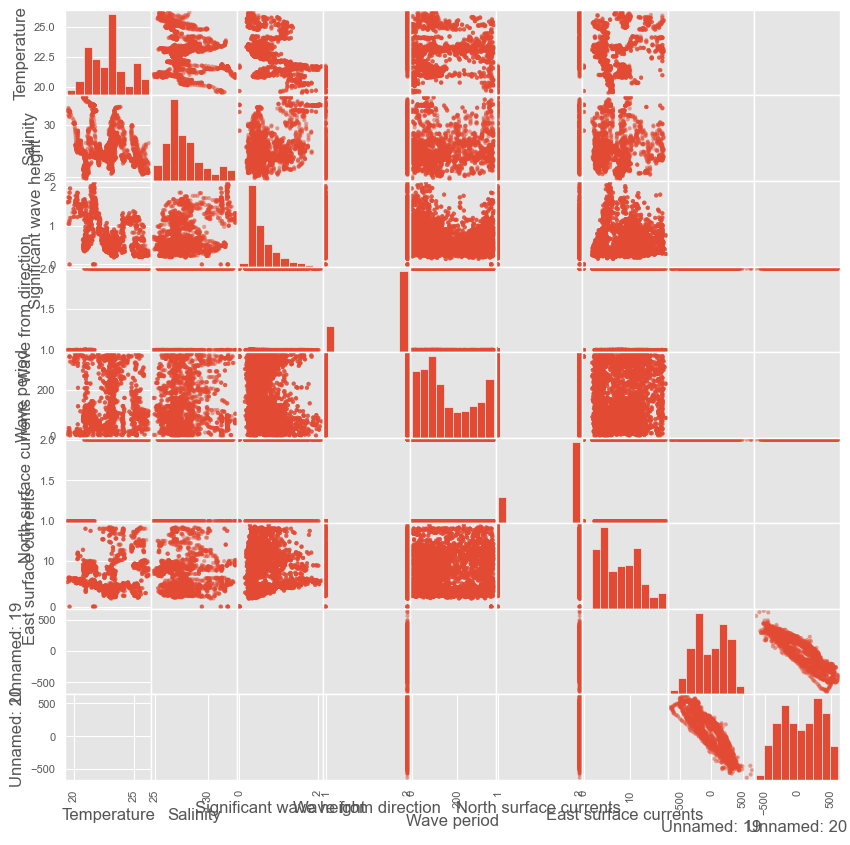

In [47]:
scatter_matrix(flOcean_dropNAN, figsize=(10,10))

In [57]:
corr_matrix = flOcean_dropNAN.corr()
corr_matrix

,Temperature,Salinity,Significant wave height,Wave from direction,Wave period,North surface currents,East surface currents,Unnamed: 19,Unnamed: 20
Temperature,1.000000,-0.271073,-0.476665,0.706167,0.063226,0.706167,0.114987,NaN,NaN
Salinity,-0.271073,1.000000,0.392211,0.001984,0.031532,0.001984,0.004732,NaN,NaN
Significant wave height,-0.476665,0.392211,1.000000,-0.030387,-0.099151,-0.030387,0.037024,NaN,NaN
Wave from direction,0.706167,0.001984,-0.030387,1.000000,-0.025544,1.000000,-0.053855,NaN,NaN
Wave period,0.063226,0.031532,-0.099151,-0.025544,1.000000,-0.025544,0.103946,NaN,NaN
North surface currents,0.706167,0.001984,-0.030387,1.000000,-0.025544,1.000000,-0.053855,NaN,NaN
East surface currents,0.114987,0.004732,0.037024,-0.053855,0.103946,-0.053855,1.000000,NaN,NaN
Unnamed: 19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.893342
Unnamed: 20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.893342,1.000000


## Interesting correlations
Temperature: Wave from direction, North surface currents
Unnamed 19: Unnamed 20 (I need to figure out what these represent.)

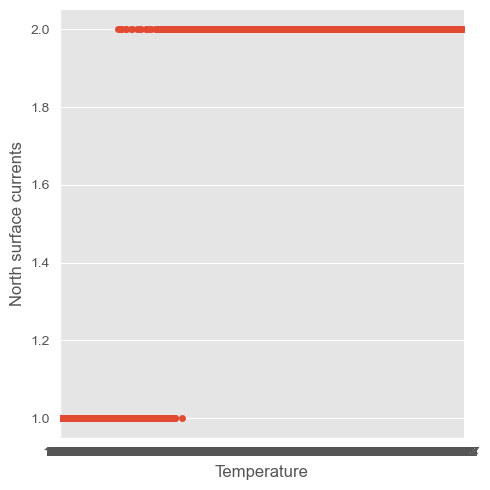

In [59]:
sns.catplot(flOcean_dropNAN, x='Temperature', y='North surface currents')